In [124]:
import os
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib
from matplotlib import pyplot
import folium
import numpy as np

In [96]:
os.listdir('.')

['Learning Python 3.ipynb',
 '.ipynb_checkpoints',
 'RasterioInDepth.ipynb',
 'top_potsdam_6_11_RGBIR.tif',
 'Mapping and visualization.ipynb',
 'top_potsdam_6_11_RGBIR.tfw']

In [97]:
%pwd

'/home/nate/projects/learn_python/wk2'

In [98]:
src = rasterio.open("top_potsdam_6_11_RGBIR.tif")
i = src.read([1, 2, 3])

In [99]:
dir(src)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_handle_crswkt',
 '_has_band',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum',
 'close',
 'closed',
 'colorinterp',
 'colormap',
 'compr

In [100]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 6000,
 'height': 6000,
 'count': 4,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(0.05, 0.0, 367276.5,
        0.0, -0.05, 5807362.6)}

In [101]:
src.transform

Affine(0.05, 0.0, 367276.5,
       0.0, -0.05, 5807362.6)

In [102]:
print(src.width)
print(src.height)

6000
6000


In [103]:
src.bounds

BoundingBox(left=367276.5, bottom=5807062.6, right=367576.5, top=5807362.6)

In [104]:
print(src.crs)
print(src.crs.wkt)

EPSG:32633
PROJCS["WGS 84 / UTM zone 33N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32633"]]


In [105]:
dst_crs = 'EPSG:4326' # 'EPSG:3857'
dst_transform, dst_width, dst_height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)

In [106]:
print(dst_transform)
print(dst_width)
print(dst_height)

| 0.00, 0.00, 13.05|
| 0.00,-0.00, 52.40|
| 0.00, 0.00, 1.00|
7341
4491


In [107]:
print("The x and y resolutions aren't really 0, they are " + str(dst_transform.a) + " and " + str(dst_transform.e) + ", respectively")

The x and y resolutions aren't really 0, they are 6.164384492408061e-07 and -6.164384492408061e-07, respectively


In [108]:
kwargs = src.meta.copy()
kwargs.update({
    'crs': dst_crs,
    'transform': dst_transform,
    'width': dst_width,
    'height': dst_height
})

In [109]:
type(i)

numpy.ndarray

In [110]:
i.shape

(3, 6000, 6000)

In [111]:
i.max()

253

In [112]:
i[i != 0].min() # Or...np.min(i[np.nonzero(i)])

3

In [113]:
dst_transform * (0, 0)

(13.049131667566938, 52.400461009508774)

In [114]:
dst_transform * (dst_width, dst_height)

(13.053656942222814, 52.39769258443324)

In [115]:
((dst_transform * (0, 0))[0] - (dst_transform * (dst_width, dst_height))[0]) / dst_transform[0]

-7340.999999998661

In [116]:
destination = np.zeros((3, dst_width, dst_height), np.uint8)

In [117]:
type(destination)

numpy.ndarray

In [118]:
destination.shape

(3, 7341, 4491)

In [119]:
# Working on this...from here below!
reproject(
    source = i,
    destination=destination,
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

In [120]:
destination

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [121]:
destination.max()

253

In [122]:
destination[destination != 0].min() # Or...np.min(destination[np.nonzero(destination)])

3

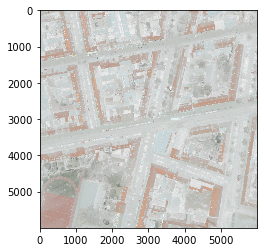

In [125]:
deleteme = src.read()
show(deleteme)

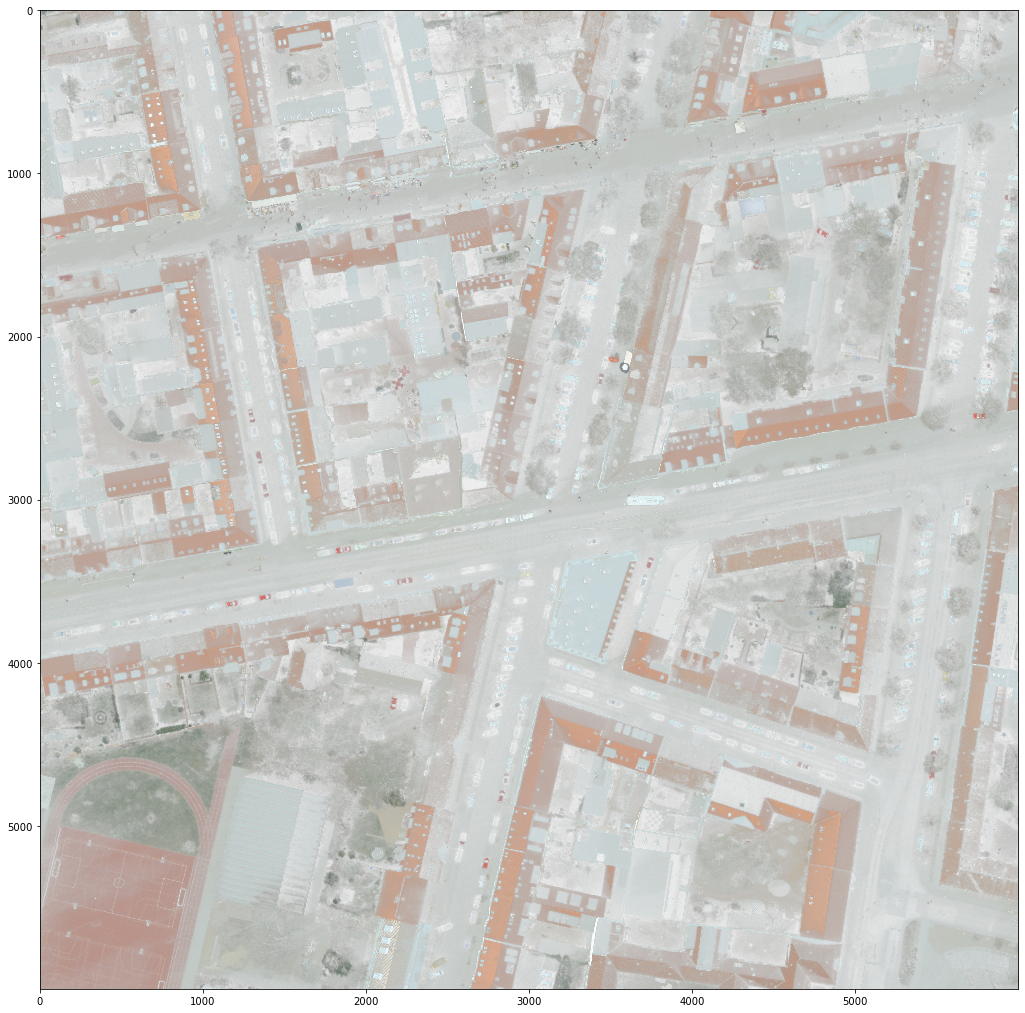

In [136]:
fig = pyplot.subplots(1, 1, figsize=(18,18))
show(deleteme)

In [137]:
ul = dst_transform * (0, 0)
lr = dst_transform * (dst_width, dst_height)
dst_bounds = [[lr[0], ul[1]], ul[0], lr[1]]
dst_bounds

[[13.053656942222814, 52.400461009508774],
 13.049131667566938,
 52.39769258443324]

In [138]:
src.close()

## Now for some new stuff

In [167]:
from skimage.segmentation import slic
from rasterio import features
from geopandas import GeoDataFrame
from collections import OrderedDict

In [143]:
with rasterio.open("top_potsdam_6_11_RGBIR.tif") as src:
    slic_params = {'compactness': 20,
                  'n_segments': 200,
                  'multichannel': True}
    img = src.read([1, 2, 3])
    image = img.transpose(1, 2, 0)
    rout = slic(image, **slic_params).astype('int32')

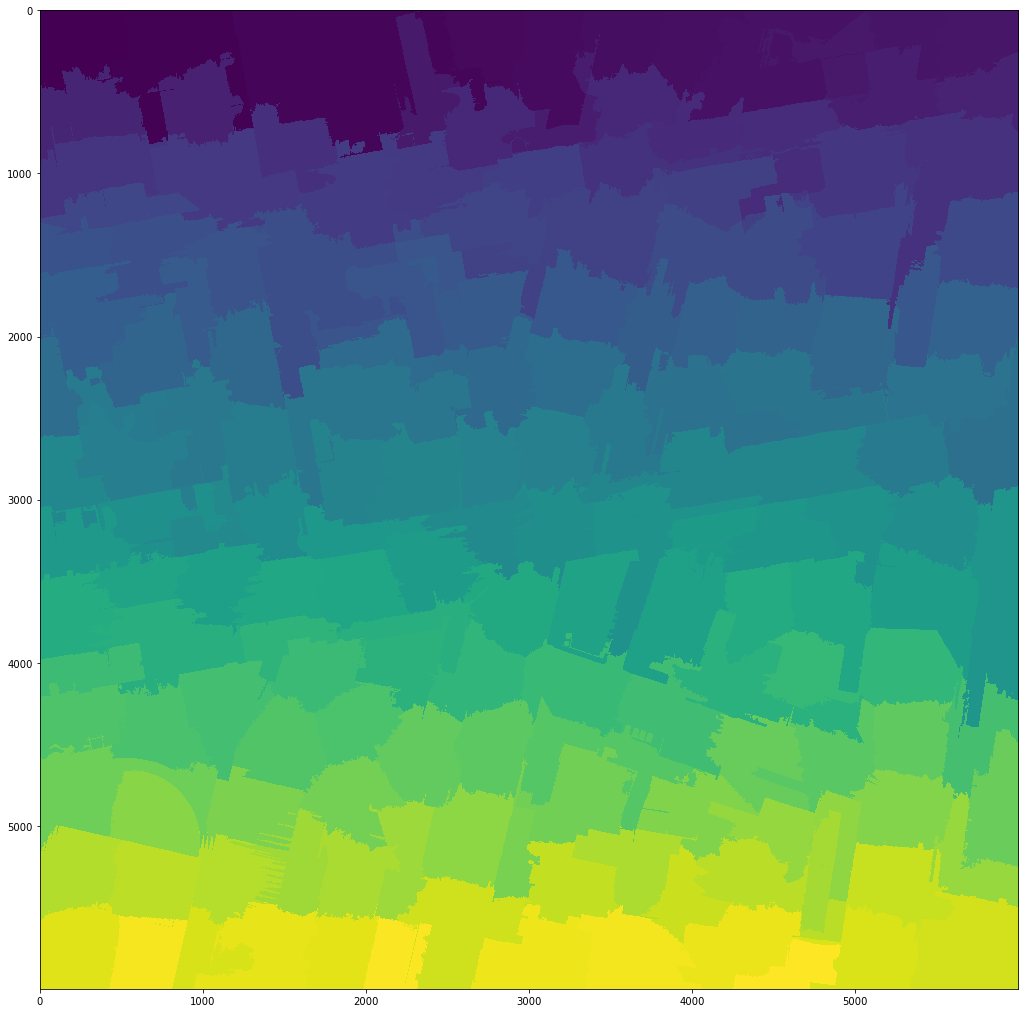

In [145]:
fig = pyplot.subplots(1, 1, figsize=(18,18))
show(rout)

In [155]:
print(type(rout))
print(rout.shape)

<class 'numpy.ndarray'>
(6000, 6000)


In [165]:
output = rout[:, :, np.newaxis].transpose(2, 0, 1)
output

array([[[  0,   0,   0, ...,  10,  10,  10],
        [  0,   0,   0, ...,  10,  10,  10],
        [  0,   0,   0, ...,  10,  10,  10],
        ...,
        [155, 155, 155, ..., 152, 152, 152],
        [155, 155, 155, ..., 152, 152, 152],
        [155, 155, 155, ..., 152, 152, 152]]], dtype=int32)

In [168]:
ras = output[0]
        
shps = features.shapes(ras, transform=src.transform)
records = []

for id, shp in enumerate(shps):
    if shp[1] != 0:
        item = {'geometry': shp[0], 'id': id+1, 'properties': 
                OrderedDict([('dn', np.int(shp[1]))]),
                'type': 'Feature'}
        records.append(item)

vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

In [169]:
vec

,geometry,dn
0,"POLYGON ((367530 5807362.6, 367530 5807362.35,...",9
1,"POLYGON ((367442.95 5807362.6, 367442.95 58073...",6
2,"POLYGON ((367553.3 5807362.6, 367553.3 5807362...",10
3,"POLYGON ((367400.45 5807362.6, 367400.45 58073...",4
4,"POLYGON ((367468.25 5807362.6, 367468.25 58073...",7
...,...,...
158,"POLYGON ((367551.7 5807092.6, 367551.7 5807092...",152
159,"POLYGON ((367323.35 5807090.199999999, 367323....",153
160,"POLYGON ((367345.4 5807089.35, 367345.4 580708...",157
161,"POLYGON ((367500.45 5807089.3, 367500.45 58070...",158


In [172]:
vec.to_file("output.shp")

In [55]:
%pwd

'/home/nate/projects/learn_python/wk2'

In [35]:
%cd wk2

/home/nate/projects/learn_python/wk2


In [36]:
%pwd

'/home/nate/projects/learn_python/wk2'

In [37]:
%system ls

['Learning Python 3.ipynb',
 'Mapping and visualization.ipynb',
 'RasterioInDepth.ipynb',
 'top_potsdam_6_11_RGBIR.tfw',
 'top_potsdam_6_11_RGBIR.tif']

In [44]:
%dirs

[]

In [45]:
%system cd ..
%system pwd

['/home/nate/projects/learn_python/wk2']

In [46]:
%cd ..
%pwd

/home/nate/projects/learn_python


'/home/nate/projects/learn_python'

In [47]:
%dirs

[]

In [48]:
%dhist

Directory history (kept in _dh)
0: /home/nate/projects/learn_python
1: /home/nate/projects/learn_python/wk2
2: /home/nate/projects/learn_python


In [81]:
src.close()

In [100]:
print("How do I get this on a different pane?")

How do I get this on a different pane?


In [101]:
rasterio.Env

rasterio.env.Env